In [ ]:
import io
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sys # only needed to determine Python version number
import matplotlib # only needed to determine Matplotlib version 
import nltk
from nltk.stem import WordNetLemmatizer
drive.mount('/content/drive',force_remount=True)
filePath = r"/content/drive/My Drive/project/GRIDSEARCH_medium_NoRetrain.csv"
csv_medium = pd.read_csv(filePath)
csv_medium.drop(csv_medium.columns[-1],axis=1,inplace=True)
filePath = r"/content/drive/My Drive/project/GRIDSEARCH_large_NoRetrain.csv"
csv_large = pd.read_csv(filePath)
csv_large.drop(csv_large.columns[-1],axis=1,inplace=True)

Mounted at /content/drive


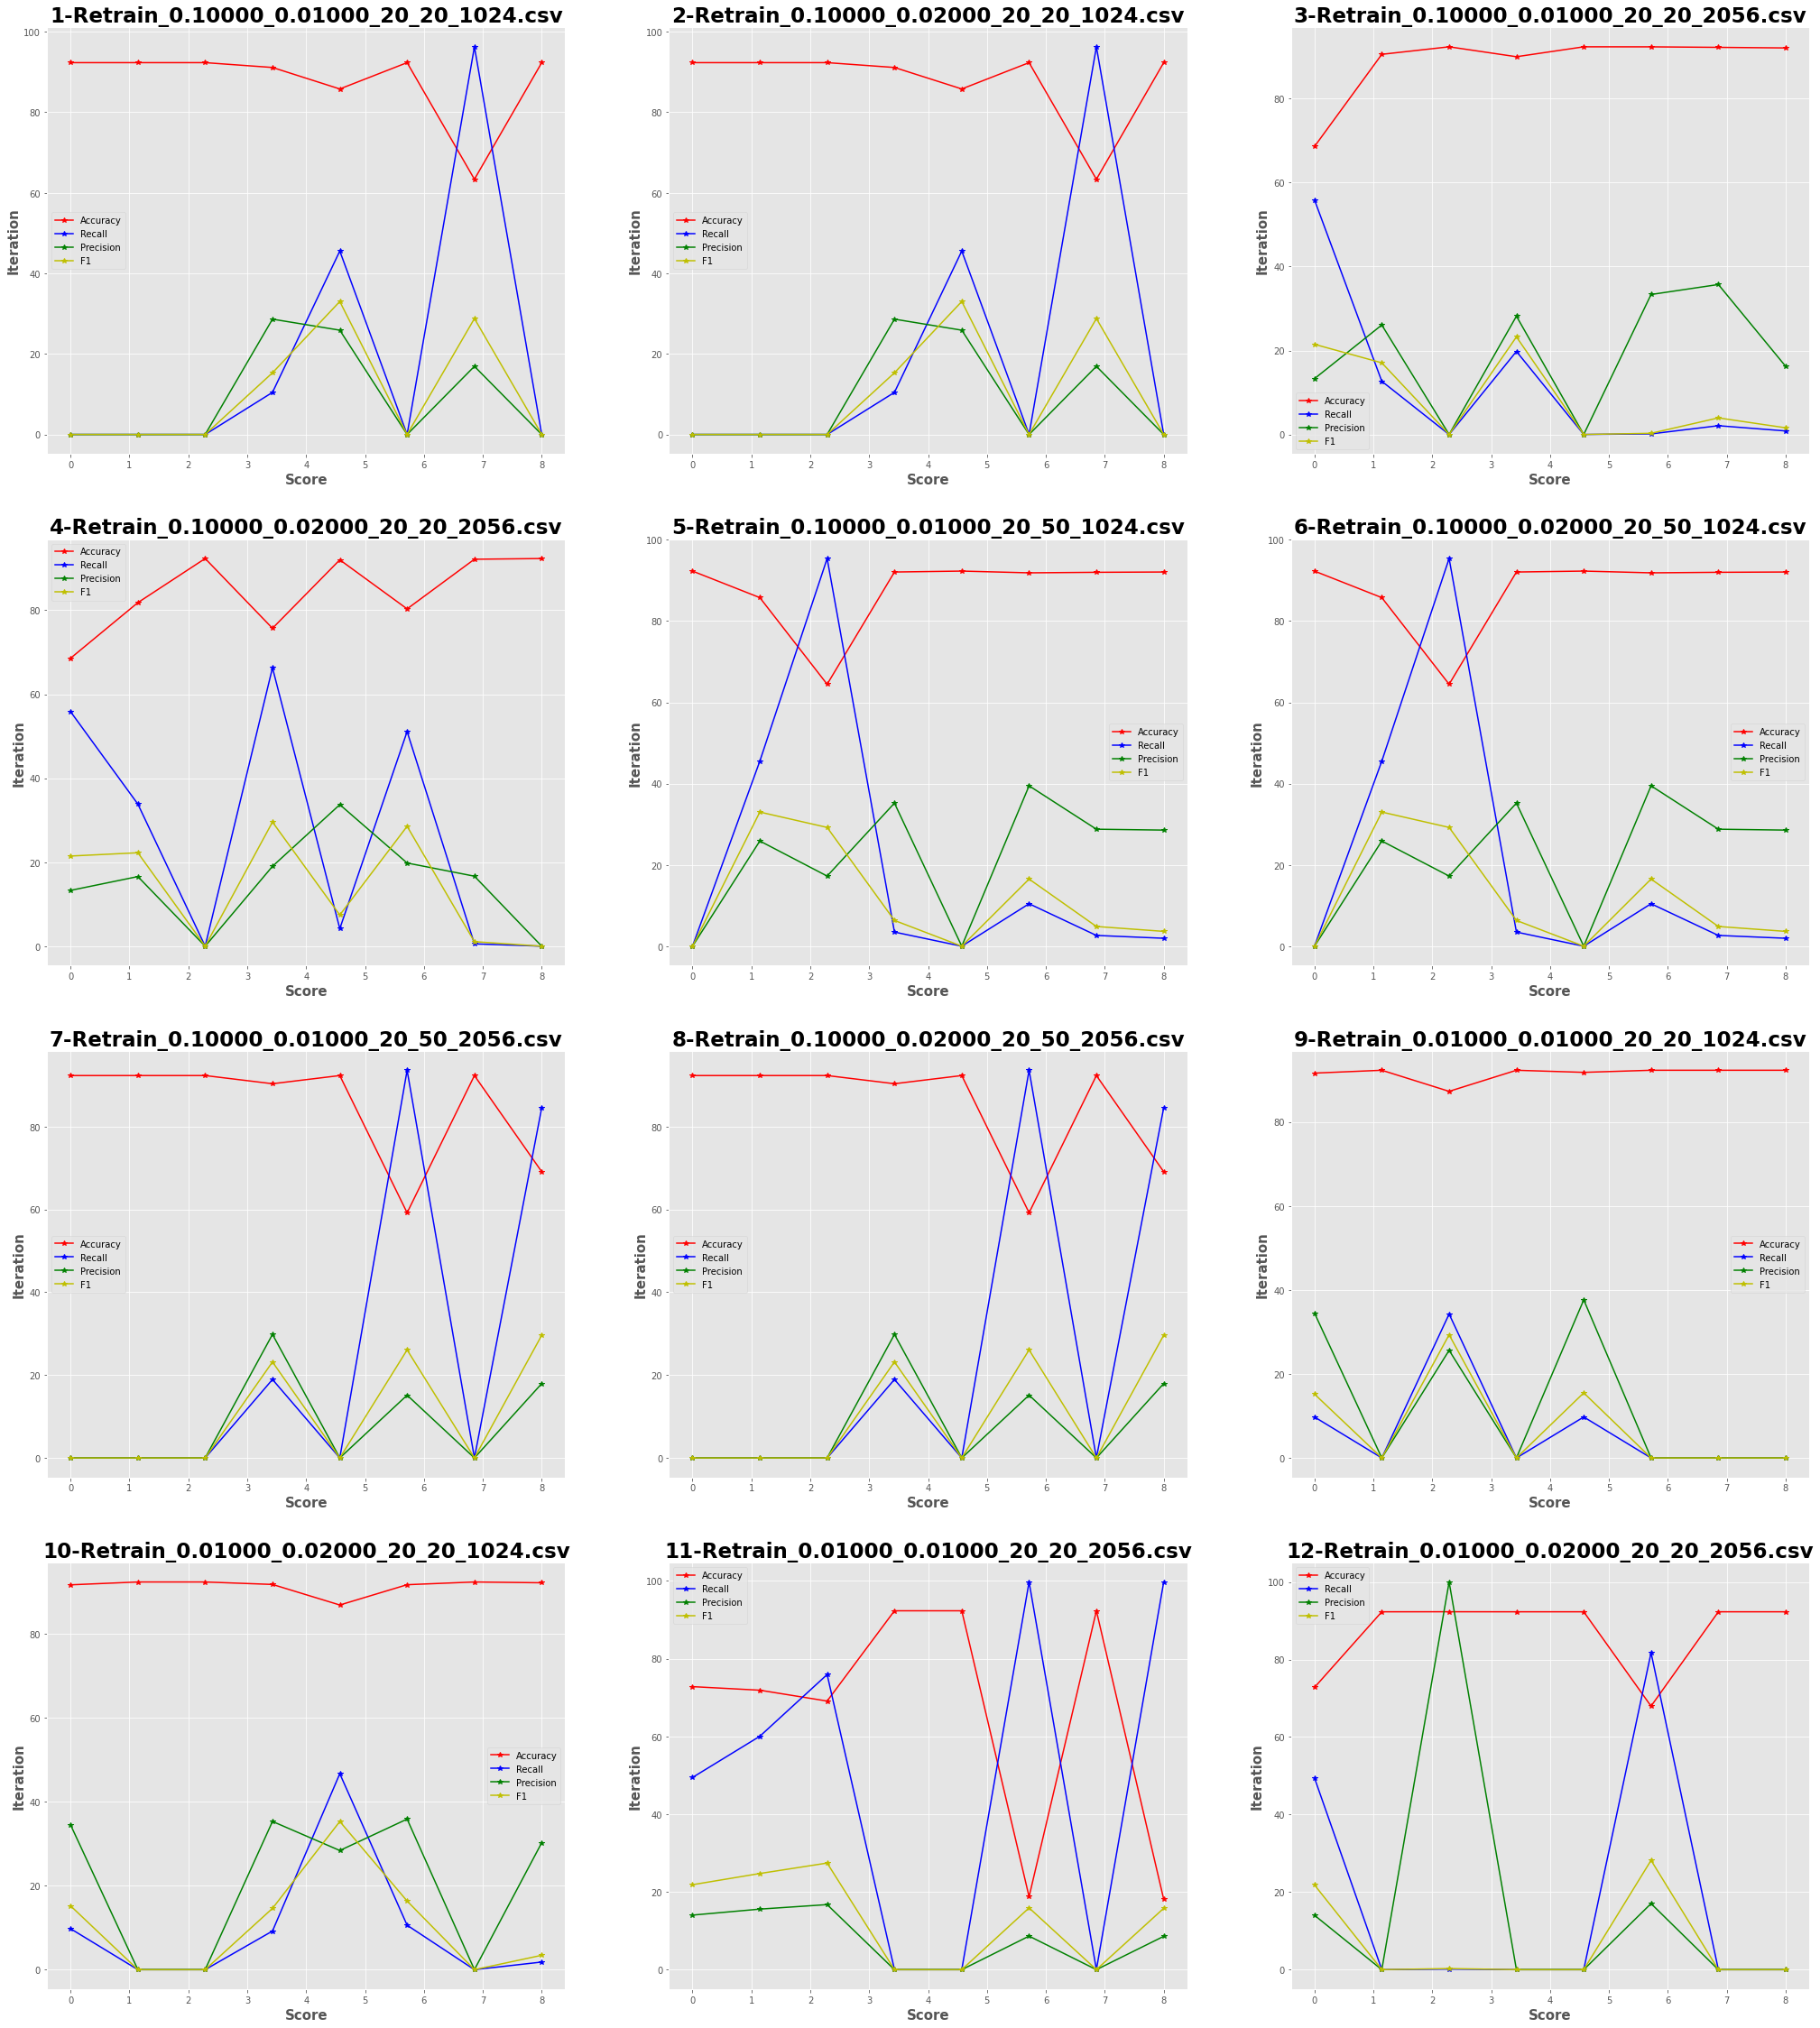

<Figure size 432x288 with 0 Axes>

In [ ]:
from os import listdir
from os.path import isfile, join
import numpy as np
import seaborn as sns;
plt.style.use('ggplot')
mypath = "/content/drive/My Drive/project/Retrain_Data"
reatrainData = pd.DataFrame()
fig, axs = plt.subplots(4, 3,figsize=(35,40))
xx = 0
yy = 0
resultsRetrain = pd.DataFrame(columns=['learning_rate', 'threshold_euclid','retrain_threshold', 'numOfEpochs', 'batch_size','numOfThreads', 'ValidAccuracy', 'ValidRecall', 'ValidPrecision', 'ValidF1', 'Time-CPU','Time-Real'])
index=0
for f in listdir(mypath):
  if isfile(join(mypath, f)):
    row = []
    csv = pd.read_csv(join(mypath, f),header=None, sep='\n')
    csv.drop(csv.index[0], inplace=True)
    

    csv = csv[0].str.split(',', expand=True)
    csv.drop(csv.columns[-1],axis=1,inplace=True)
    learning_rate = csv.loc[1,0]
    row.append(learning_rate)
    euclid_threshold = csv.loc[1,1]
    row.append(euclid_threshold)
    retrain_threshold = csv.loc[1,2]
    row.append(retrain_threshold)
    epochs = csv.loc[1,3]
    row.append(epochs)
    batches = csv.loc[1,4]
    row.append(batches)
    numThreads = csv.loc[1,5]
    row.append(numThreads)
    

    i=6
    test_counter=0
    test_metrics = []
    acc = []
    recall = []
    precision = []
    f1 = []

    while i < len(csv.columns):
      if i ==  len(csv.columns)-6:
        val_metrics = csv.loc[1,i:i+3]
        valacc = float(csv.loc[1,i])
        row.append(valacc)
        valrecall = float(csv.loc[1,i+1])
        row.append(valrecall)
        valprecision=float(csv.loc[1,i+2])
        row.append(valprecision)
        valf1=float(csv.loc[1,i+3])
        row.append(valf1) 

        timeCpu=float(csv.loc[1,i+4])
        row.append(timeCpu) 
        timeReal=float(csv.loc[1,i+5])
        row.append(timeReal) 
        resultsRetrain.loc[len(resultsRetrain)+1] = row
        break

      else:
        test_metrics.append(csv.loc[1,i:i+3])
        acc.append(float(csv.loc[1,i]))
        recall.append(float(csv.loc[1,i+1]))
        precision.append(float(csv.loc[1,i+2]))
        f1.append(float(csv.loc[1,i+3]))
        test_counter+=1
      i+=4

    if xx < 4:
      x=np.linspace(0,100)      
      y=np.linspace(0,test_counter,num=test_counter)
      axs[xx,yy].plot(y,acc,'r',label='Accuracy',marker='*')
      axs[xx,yy].plot(y,recall,'b',label='Recall',marker='*')
      axs[xx,yy].plot(y,precision,'g',label='Precision',marker='*')
      axs[xx,yy].plot(y,f1,'y',label='F1',marker='*')
      index+=1
      axs[xx,yy].set_title(str(index)+'-'+f,fontsize=23,fontweight='bold')
      axs[xx,yy].set_xlabel('Score',fontsize=15,fontweight='bold')
      axs[xx,yy].set_ylabel('Iteration',fontsize=15,fontweight='bold')
      axs[xx,yy].legend()

      yy+=1
      if yy == 3:
        yy=0
        xx+=1

plt.show()
plt.savefig('foo.png')

In [ ]:
df = resultsRetrain
df = df.sort_values(by='ValidAccuracy')
df

,learning_rate,threshold_euclid,retrain_threshold,numOfEpochs,batch_size,numOfThreads,ValidAccuracy,ValidRecall,ValidPrecision,ValidF1,Time-CPU,Time-Real
11,0.010000,0.000100,0.010000,20,2056,20,17.76,99.16,8.50,15.65,7.56,16.78
7,0.100000,0.000100,0.010000,50,2056,20,69.73,86.35,18.52,30.50,17.46,34.37
8,0.100000,0.000100,0.020000,50,2056,20,69.73,86.35,18.52,30.50,17.37,34.38
33,0.00100,0.001,0.010000,50,512,20,87.91,28.62,53.01,37.17,99.47,115.18
35,0.00100,0.001,0.020000,50,512,20,87.96,19.72,55.17,29.06,32.37,34.61
23,0.001000,0.000100,0.010000,50,2056,20,90.65,21.59,33.33,26.20,13.53,26.15
24,0.001000,0.000100,0.020000,50,2056,20,90.65,21.59,33.33,26.20,13.66,26.77
13,0.010000,0.000100,0.010000,50,1024,20,91.15,24.93,38.41,30.24,14.44,21.79
14,0.010000,0.000100,0.020000,50,1024,20,91.15,24.93,38.41,30.24,14.38,20.57
20,0.001000,0.000100,0.020000,20,2056,20,91.45,10.72,32.91,16.18,6.74,9.77


In [ ]:
csv_medium.sort_values(by='TestAccuracy')

,learning_rate,threshold_euclid,numOfEpochs,batch_size,numOfThreads,TestAccuracy,TestRecall,TestPrecision,TestF1,ValidAccuracy,ValidRecall,ValidPrecision,ValidF1,Time-CPU,Time-Real,Unnamed: 15
73,0.100,0.000,5,512,15,12.50,100.00,12.50,22.22,12.50,100.00,12.50,22.22,1.12,1.14,NaN
154,0.010,0.100,10,512,15,12.50,100.00,12.50,22.22,12.50,100.00,12.50,22.22,2.08,2.21,NaN
184,0.010,0.001,5,1024,15,12.50,100.00,12.50,22.22,12.50,100.00,12.50,22.22,1.11,1.21,NaN
190,0.010,0.001,10,512,15,12.50,100.00,12.50,22.22,12.50,100.00,12.50,22.22,2.07,2.22,NaN
220,0.010,0.000,5,1024,15,12.50,100.00,12.50,22.22,12.50,100.00,12.50,22.22,1.08,1.19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.010,0.000,50,512,10,88.42,9.79,80.02,17.45,88.44,9.99,80.34,17.77,10.00,10.62,NaN
317,0.001,0.100,50,512,20,88.49,11.50,76.44,19.99,88.56,11.97,77.68,20.74,9.24,9.85,NaN
389,0.001,0.000,50,512,20,88.52,12.06,75.64,20.81,88.61,12.60,77.26,21.66,9.86,13.65,NaN
425,0.001,0.000,50,512,20,88.52,12.06,75.64,20.81,88.61,12.60,77.26,21.66,9.85,10.48,NaN


In [ ]:
csv_medium.sort_values('ValidAccuracy',ascending = False).head(5)

,learning_rate,threshold_euclid,numOfEpochs,batch_size,numOfThreads,TestAccuracy,TestRecall,TestPrecision,TestF1,ValidAccuracy,ValidRecall,ValidPrecision,ValidF1,Time-CPU,Time-Real,Unnamed: 15
425,0.001,0.000,50,512,20,88.52,12.06,75.64,20.81,88.61,12.60,77.26,21.66,9.85,10.48,NaN
353,0.001,0.001,50,512,20,88.52,12.06,75.64,20.81,88.61,12.60,77.26,21.66,9.86,10.50,NaN
389,0.001,0.000,50,512,20,88.52,12.06,75.64,20.81,88.61,12.60,77.26,21.66,9.86,13.65,NaN
317,0.001,0.100,50,512,20,88.49,11.50,76.44,19.99,88.56,11.97,77.68,20.74,9.24,9.85,NaN
243,0.010,0.000,50,512,10,88.42,9.79,80.02,17.45,88.44,9.99,80.34,17.77,9.98,10.61,NaN


In [ ]:
csv_large.sort_values(by='ValidAccuracy')

,learning_rate,threshold_euclid,numOfEpochs,batch_size,numOfThreads,TestAccuracy,TestRecall,TestPrecision,TestF1,ValidAccuracy,ValidRecall,ValidPrecision,ValidF1,Time-CPU,Time-Real
73,0.100,0.000,5,512,15,12.50,100.00,12.50,22.22,12.50,100.00,12.50,22.22,1.12,1.14
154,0.010,0.100,10,512,15,12.50,100.00,12.50,22.22,12.50,100.00,12.50,22.22,2.08,2.21
184,0.010,0.001,5,1024,15,12.50,100.00,12.50,22.22,12.50,100.00,12.50,22.22,1.11,1.21
190,0.010,0.001,10,512,15,12.50,100.00,12.50,22.22,12.50,100.00,12.50,22.22,2.07,2.22
220,0.010,0.000,5,1024,15,12.50,100.00,12.50,22.22,12.50,100.00,12.50,22.22,1.08,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.010,0.000,50,512,10,88.42,9.79,80.02,17.45,88.44,9.99,80.34,17.77,9.98,10.61
317,0.001,0.100,50,512,20,88.49,11.50,76.44,19.99,88.56,11.97,77.68,20.74,9.24,9.85
389,0.001,0.000,50,512,20,88.52,12.06,75.64,20.81,88.61,12.60,77.26,21.66,9.86,13.65
425,0.001,0.000,50,512,20,88.52,12.06,75.64,20.81,88.61,12.60,77.26,21.66,9.85,10.48


In [ ]:
csv_large.sort_values('TestAccuracy',ascending = False).head(5)

,learning_rate,threshold_euclid,numOfEpochs,batch_size,numOfThreads,TestAccuracy,TestRecall,TestPrecision,TestF1,ValidAccuracy,ValidRecall,ValidPrecision,ValidF1,Time-CPU,Time-Real
425,0.001,0.000,50,512,20,88.52,12.06,75.64,20.81,88.61,12.60,77.26,21.66,9.85,10.48
389,0.001,0.000,50,512,20,88.52,12.06,75.64,20.81,88.61,12.60,77.26,21.66,9.86,13.65
353,0.001,0.001,50,512,20,88.52,12.06,75.64,20.81,88.61,12.60,77.26,21.66,9.86,10.50
317,0.001,0.100,50,512,20,88.49,11.50,76.44,19.99,88.56,11.97,77.68,20.74,9.24,9.85
279,0.010,0.000,50,512,10,88.42,9.79,80.02,17.45,88.44,9.99,80.34,17.77,10.00,10.62


In [ ]:
csv_medium.sort_values(by='ValidAccuracy')

,learning_rate,threshold_euclid,numOfEpochs,batch_size,numOfThreads,TestAccuracy,TestRecall,TestPrecision,TestF1,ValidAccuracy,ValidRecall,ValidPrecision,ValidF1,Time-CPU,Time-Real,Unnamed: 15
73,0.100,0.000,5,512,15,12.50,100.00,12.50,22.22,12.50,100.00,12.50,22.22,1.12,1.14,NaN
154,0.010,0.100,10,512,15,12.50,100.00,12.50,22.22,12.50,100.00,12.50,22.22,2.08,2.21,NaN
184,0.010,0.001,5,1024,15,12.50,100.00,12.50,22.22,12.50,100.00,12.50,22.22,1.11,1.21,NaN
190,0.010,0.001,10,512,15,12.50,100.00,12.50,22.22,12.50,100.00,12.50,22.22,2.07,2.22,NaN
220,0.010,0.000,5,1024,15,12.50,100.00,12.50,22.22,12.50,100.00,12.50,22.22,1.08,1.19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.010,0.000,50,512,10,88.42,9.79,80.02,17.45,88.44,9.99,80.34,17.77,9.98,10.61,NaN
317,0.001,0.100,50,512,20,88.49,11.50,76.44,19.99,88.56,11.97,77.68,20.74,9.24,9.85,NaN
389,0.001,0.000,50,512,20,88.52,12.06,75.64,20.81,88.61,12.60,77.26,21.66,9.86,13.65,NaN
425,0.001,0.000,50,512,20,88.52,12.06,75.64,20.81,88.61,12.60,77.26,21.66,9.85,10.48,NaN
